## ANALISIS DE RESULTADOS DE LOS MODELOS 


### **1. Regresión Logística**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('Resultados/LR Resultados.xlsx')
df.head()

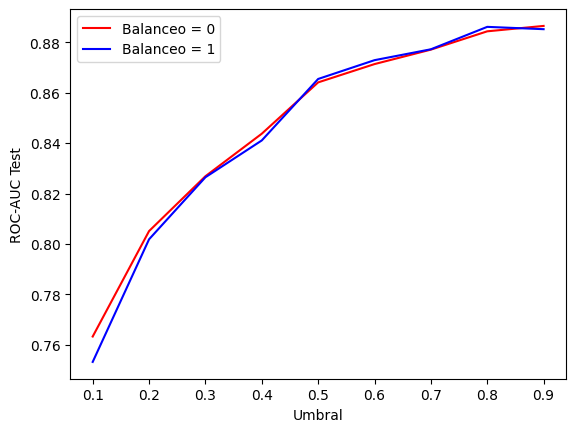

In [3]:
# Filtrar los datos para las dos categorías de "Balanceo"
df_balanceo_0 = df[df['Balanceo'] == 0]
df_balanceo_1 = df[df['Balanceo'] == 1]

# Crear un gráfico con líneas rojas para "Balanceo = 0"
plt.plot(df_balanceo_0['Umbral'], df_balanceo_0['Roc-Auc Test'], label='Balanceo = 0', color='red')

# Crear un gráfico con líneas azules para "Balanceo = 1"
plt.plot(df_balanceo_1['Umbral'], df_balanceo_1['Roc-Auc Test'], label='Balanceo = 1', color='blue')

# Agregar etiquetas y leyenda
plt.xlabel('Umbral')
plt.ylabel('ROC-AUC Test')
plt.legend()

# Mostrar el gráfico
plt.show()

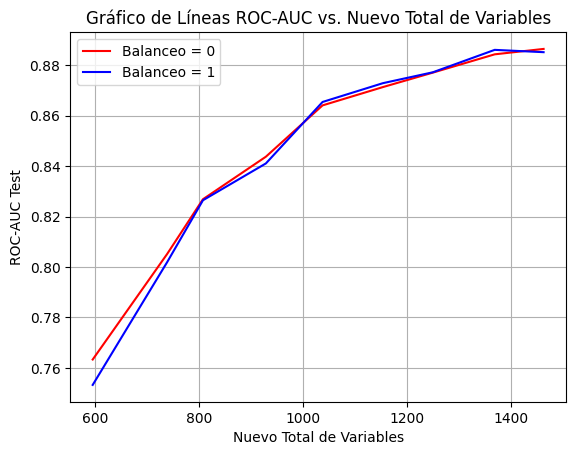

In [8]:
# Línea para "Balanceo = 0"
plt.plot(df_balanceo_0['Nuevo Total de Variables'], df_balanceo_0['Roc-Auc Test'], label='Balanceo = 0', color='red')

# Línea para "Balanceo = 1"
plt.plot(df_balanceo_1['Nuevo Total de Variables'], df_balanceo_1['Roc-Auc Test'], label='Balanceo = 1', color='blue')

# Etiquetas de ejes y leyenda
plt.xlabel('Nuevo Total de Variables')
plt.ylabel('ROC-AUC Test')
plt.legend()

# Título del gráfico (opcional)
plt.title('Gráfico de Líneas ROC-AUC vs. Nuevo Total de Variables')

# Mostrar el gráfico
plt.grid(True)
plt.show()


### **2. Arboles de decision**

In [37]:
df = pd.read_excel('Resultados/DT_resultados tabla.xlsx', sheet_name='Hoja2')
df.fillna(100)

agg_df = df.groupby(['max_depth', 'Balanceado', 'min_samples_split', 'min_samples_leaf'])['ROC-AUC'].agg(['mean', 'std']).reset_index()

# Renombra las columnas en el nuevo DataFrame
agg_df.columns = ['max_depth', 'Balanceado', 'min_samples_split', 'min_samples_leaf', 'ROC-AUC_mean', 'ROC-AUC_std']

df = agg_df.copy()

df.to_excel('resultados/DT_agrupado.xlsx')

In [38]:
df.head(100)

,max_depth,Balanceado,min_samples_split,min_samples_leaf,ROC-AUC_mean,ROC-AUC_std
0,10,0,2,1,0.802339,0.003123
1,10,0,5,2,0.803757,0.001355
2,10,0,10,4,0.820640,0.000930
3,10,1,2,1,0.874131,0.001585
4,10,1,5,2,0.875026,0.000717
5,10,1,10,4,0.875301,0.000267
6,20,0,2,1,0.807256,0.004002
7,20,0,5,2,0.822820,0.003444
8,20,0,10,4,0.827940,0.001563
9,20,1,2,1,0.869947,0.008959


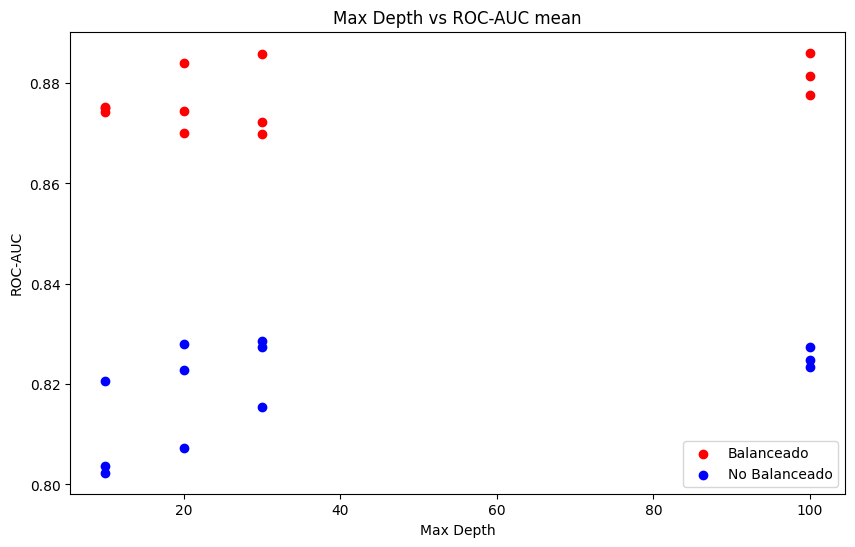

In [39]:

# Supongamos que tu DataFrame se llama df
# Debes asegurarte de haber cargado tus datos en df antes de ejecutar este código

# Filtrar los datos balanceados y no balanceados
df_balanceado = df[df['Balanceado'] == 1]
df_no_balanceado = df[df['Balanceado'] == 0]

# Crear el gráfico de líneas para max_depth vs ROC-AUC
plt.figure(figsize=(10, 6))

# Línea roja para datos balanceados
plt.scatter(df_balanceado['max_depth'], df_balanceado['ROC-AUC_mean'], color='red', label='Balanceado')

# Línea azul para datos no balanceados
plt.scatter(df_no_balanceado['max_depth'], df_no_balanceado['ROC-AUC_mean'], color='blue', label='No Balanceado')

# Configurar etiquetas y título
plt.xlabel('Max Depth')
plt.ylabel('ROC-AUC')
plt.title('Max Depth vs ROC-AUC mean')
plt.legend(loc='best')

# Mostrar el gráfico
plt.show()


### **3. Random Forest**

In [40]:
df = pd.read_excel('Resultados/RF Resultados no bal y bal.xlsx', sheet_name='datos')
df.fillna(100)

,balanceado,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_test_accuracy,std_test_accuracy,mean_test_roc_auc,std_test_roc_auc
0,0,10,log2,1,2,50,0.755107,0.007781,0.557568,0.010921
1,0,10,log2,1,2,100,0.754161,0.006143,0.556701,0.008457
2,0,10,log2,1,2,200,0.756242,0.005777,0.559220,0.007270
3,0,10,log2,1,5,50,0.753783,0.005662,0.556660,0.007630
4,0,10,log2,1,5,100,0.752648,0.006504,0.553261,0.009628
...,...,...,...,...,...,...,...,...,...,...
427,1,100,sqrt,4,5,100,0.888701,0.042304,0.888701,0.042304
428,1,100,sqrt,4,5,200,0.893896,0.041539,0.893896,0.041539
429,1,100,sqrt,4,10,50,0.884935,0.040160,0.884935,0.040160
430,1,100,sqrt,4,10,100,0.888052,0.040211,0.888052,0.040211


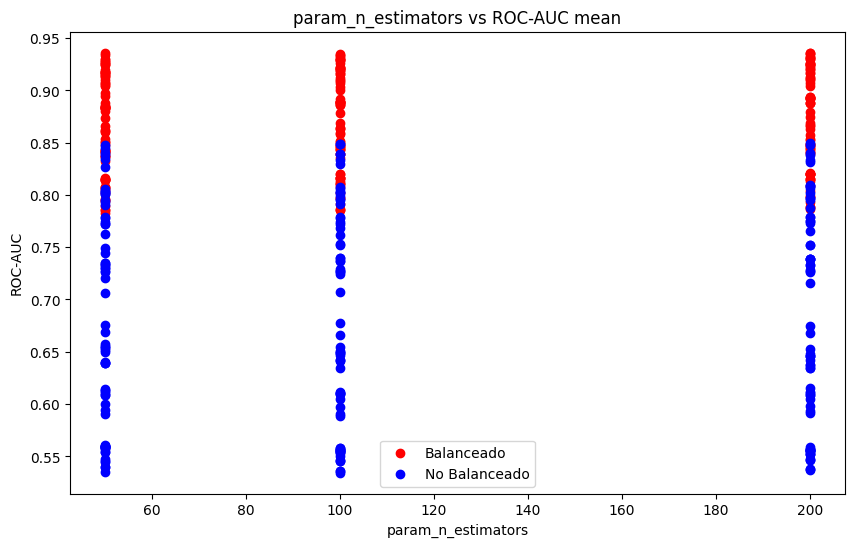

In [43]:
# Supongamos que tu DataFrame se llama df
# Debes asegurarte de haber cargado tus datos en df antes de ejecutar este código

# Filtrar los datos balanceados y no balanceados
df_balanceado = df[df['balanceado'] == 1]
df_no_balanceado = df[df['balanceado'] == 0]

# Crear el gráfico de líneas para max_depth vs ROC-AUC
plt.figure(figsize=(10, 6))

# Línea roja para datos balanceados
plt.scatter(df_balanceado['param_n_estimators'], df_balanceado['mean_test_roc_auc'], color='red', label='Balanceado')

# Línea azul para datos no balanceados
plt.scatter(df_no_balanceado['param_n_estimators'], df_no_balanceado['mean_test_roc_auc'], color='blue', label='No Balanceado')

# Configurar etiquetas y título
plt.xlabel('param_n_estimators')
plt.ylabel('ROC-AUC')
plt.title('param_n_estimators vs ROC-AUC mean')
plt.legend(loc='best')

# Mostrar el gráfico
plt.show()
